In [13]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

<center>
<img src="https://github.com/randall-romero/EC4301/blob/master/Laboratorios/Tema02-Ecuaciones/escuela-de-economia.png?raw=1" width="260" height="85">
</center>
<center>
    <b>EC4301 MACROECONOMETRÍA</b><br>
    <b>Estudiantes:  David Gerardo Mora Salazar, Manfred Ramírez Alfaro</b>
<br><br>
<b>Tarea 4:</b>
<div style="font-size:175%;color:white; background-color: #0064b0;">Profesor: Randall Romero Aguilar, PhD
</div>
<div style="font-size:250%;color:white; background-color: #0064b0;">Fecha límite de entrega: viernes 31 de mayo de 2021, 6pm</div> 
</center>


Pregunta 1:
Usando FRED obtenga la serie del tipo de cambio de la libra esterlina respecto al dólar estadounidense,
disponible en https://fred.stlouisfed.org/series/DEXUSUK. (Pista: el paquete pandas_datareader
permite descargar datos de FRED directamente a Python; en Stata y R hay funciones similares.) Utilice
datos desde 1971.

(a) (5 puntos ) Grafique la serie original. ¿Cuál es el rango de los datos?

DEXUSUK    2.644
dtype: float64

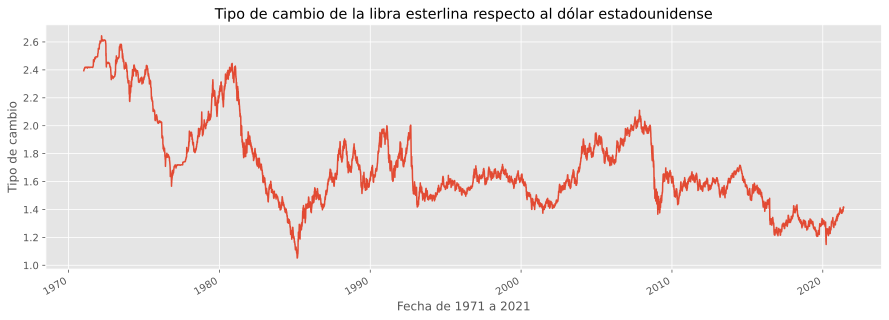

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime
from arch import arch_model
from itertools import product
start = datetime.datetime(1971, 1, 1)
end = datetime.datetime(2021, 5, 21)
EXC = web.DataReader('DEXUSUK', 'fred', start, end)
EXC.head()
EXC=EXC.dropna()
def figura(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(15,5))
    ax = datos.plot(ax=ax, legend=None)
    ax.set(title=titulo, xlabel="Fecha de 1971 a 2021", ylabel=y)
    return fig
figura(EXC,"Tipo de cambio de la libra esterlina respecto al dólar estadounidense", "Tipo de cambio")
EXC.min()
EXC.max()

El rango de los datos se encuentran entre 1.052 y 2.644.

(b) (5 puntos ) Calcule la depreciación de la libra frente al dólar como la primera diferencia del logaritmo
de la serie anterior.

In [15]:
depreciacion = np.log(EXC).diff()


(c) (5 puntos ) Haga un gráfico de la depreciación.

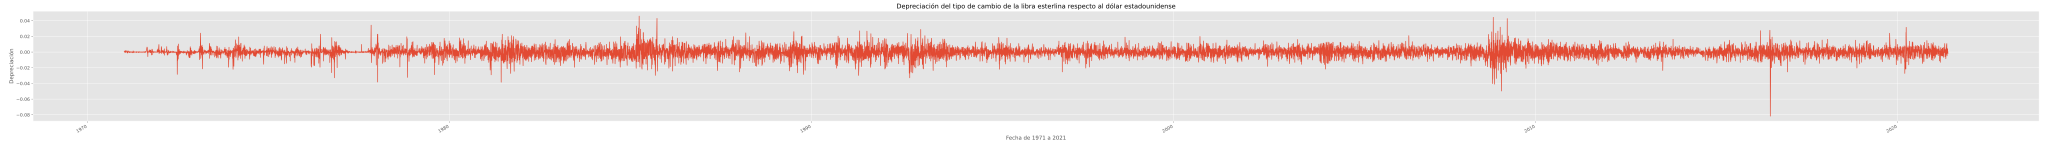

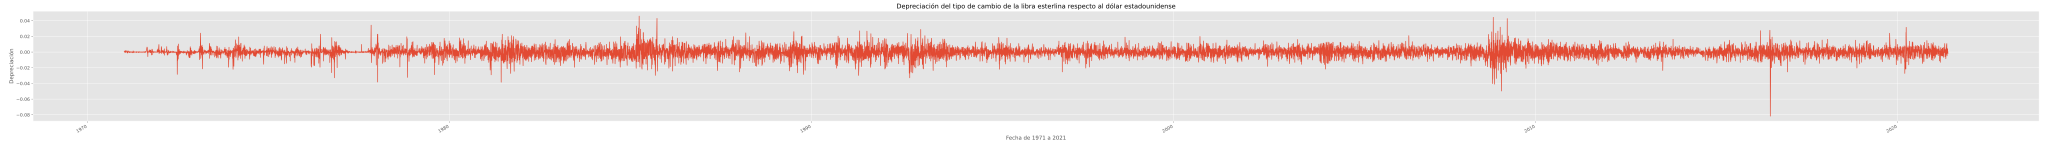

In [17]:
def figura1(datos, titulo, y):
    fig, ax = plt.subplots(figsize=(80,5))
    ax = datos.plot(ax=ax, legend=None)
    ax.set(title=titulo, xlabel="Fecha de 1971 a 2021", ylabel=y)
    return fig
figura1(depreciacion,"Depreciación del tipo de cambio de la libra esterlina respecto al dólar estadounidense", "Depreciación")


In [ ]:
plt.style.use('ggplot')
plt.hist(depreciacion, bins=32)
plt.title('Histograma de la depreciación')
plt.ylabel("Frecuencia")
plt.xlabel("Depreciación")
plt.show()

(d) (5 puntos ) Haga un histograma de la depreciación, usando 32 intervalos.

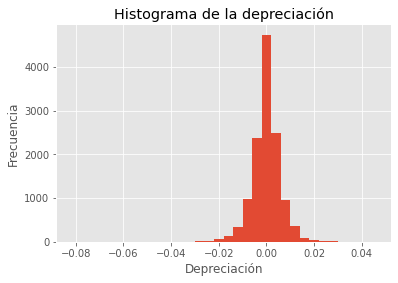

(e) (10 puntos ) ¿En qué porcentaje de días este tipo de cambio ha variado en más de un 2% en un
sólo día?

In [18]:
depreciacion = pd.DataFrame(depreciacion)
depreciacion.columns = ["depreciacion"]
total = 0
for i in depreciacion.depreciacion:
    if i<-0.02 or i>0.02:
        total+=1
porcentaje = 100*total/len(depreciacion)
print(porcentaje)

0.9336181659941452


El porcentaje es del 0.9336%.

(f) (10 puntos ) Determine todas las fechas en las que este tipo de cambio haya variado en más de un
5% en un solo día. (Pista: en Python la función query de las tablas de datos le puede ayudar a
encontrarlos.) Busque noticias en Internet que expliquen estos episodios tan extremos, y haga un
breve resumen de sus hallazgos (máximo un párrafo por cada episodio)

In [19]:
depreciacion.query('depreciacion>0.05 or depreciacion < -0.05')


,depreciacion
DATE,
2016-06-24,-0.081694


Evidentemente el único episodio extremo sucedió en un día después 
del referendum del Brexit, la partida de Reino Unido de la Unión Europea.
Esta tragedia fue el 2016-06-24, en  donde la depreciación de la libra respecto al dólar
en un solo día fue de -0.081694. Una fuerte depreciación en varias monedas, fue el impacto que dejó el anunció del sí a la salida de Gran Bretaña de la Zona Euro.
El valor de la libra esterlina ha caído dramáticamente como resultado de la decisión del Reino Unido de abandonar la Unión Europea, un desarrollo político que empieza a tener impacto en la economía mundial.
Las bolsas en todo el mundo sufrieron también fuertes caídas a lo largo de la jornada del viernes.
Las bolsas en todo el mundo sufrieron también fuertes caídas a lo largo de la jornada del viernes.
para el modelo GARCH(p,q) se utiliza el criterio a Akaike y el bayesiano para 
especificar los parámetros.

(g) (30 puntos ) Estime un modelo GARCH de esto datos. Justifique las elecciones que deba realizar

In [ ]:
#para el modelo GARCH(p,q) se utiliza el criterio a Akaike y el bayesiano para 
#especificar los parámetros.
depreciacion=depreciacion.dropna()
depreciacion=depreciacion["depreciacion"].round(decimals=4)
pvalores = range(1,4)
qvalores = range(0,4)
criterios = pd.DataFrame(0, columns =['p','q','AIC','BIC', 'Σa'], index=range(15))
for i, (p, q) in enumerate(product(pvalores, qvalores)):
    res = arch_model(depreciacion, vol='GARCH', p=p, o=0, q=q, dist='Normal').fit(disp='off')
    criterios.loc[i] = (p, q, res.aic, res.bic, res.params.filter(regex='^alpha').sum())
#según los resultados vemos que ambos criterios coinciden en (p,q)=(1,2).
#donde además si cumple con la condición de suma de alpha menor a 1.
print(criterios.BIC.idxmin())
print(criterios.AIC.idxmin())
model= arch_model(depreciacion, vol='GARCH', p=1, o=0, q=2, dist='Normal')
resultado=model.fit()
resultado.summary()

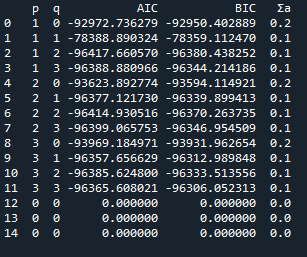

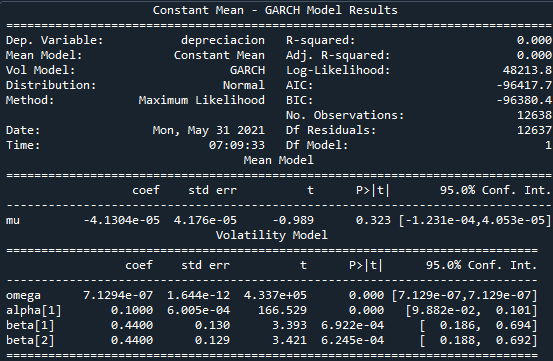

Primero, se utilizan los criterios de Akaike y el bayesiano para poder encontrar los parámetros p y q de mejor ajuste al model GARCH. Se encuentra en que ambos coinciden en el valor mínimo cuando p=1 y q=2. Además sobre este también se cumple que el alpha es menor a 1. Tomando estos parámetros se corre el modelo que brinda datos significativos de omega, alpha y betas.

Pregunta 2:
¿Es correcta esta implementación de una simulación del proceso ARCH(1)? Explique detalladamente.

Primero, se cumple que la distribución de ruido blanco tenga una 
distribución normal(0,1).
También se cumple con el modelo que omega sea mayor a 0 y alpha un valor entre
1 y -1 para que el valor de la varianza se pueda calcular.
El problema se encuentra en que se está tomando el cuadrado de e por lo que
solo se obtienen los valores positivos de esta y vemos que el valor mínimo, por lo tanto, de
Y será de 10.
Por lo tanto implementar esta simulación no es correcta, aunque los coeficientes
sean significativos y dentro de los valores deseados no son los correctos.
Por ejemplo, en esta simulación se tendría un mu mayor que un mu de una simulación correcta, se puede ver
que la media condicional resulta en 10.60, mayor al valor esperado si la simulación fuera
correcta, que es de 10.

In [22]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [29]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Tarea_4_Macroeconometría.ipynb')